In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

In [2]:
class Board:
    
    def __init__(self):        
        self.board = np.ones(shape=(8,8))
        
        
    def cross_taken(self, posns): # pos=[(1,1),(4,5)]
        
        for pos in posns:  
            row = pos[0]
            col = pos[1]

            self.board[row,:] = 0
            self.board[:, col] = 0
            
            if row>=col:
                i=0
                while 7-i-(row-col)>=0:
                    self.board[7-i,7-i-(row-col)] = 0
                    i+=1

            if row<col:
                i=0
                while 7-i-(col-row)>=0:
                    self.board[7-i-(col-row),7-i] = 0
                    i+=1
           
            if col+row<=7:
                i=0
                while i<=col+row:
                    self.board[(col+row)-i,i] = 0
                    i+=1
            else:
                i=0
                while i<=14-(col+row):
                    self.board[7-i,(col+row)+i-7] = 0
                    i+=1
                    
        
class Queen:
    
    def __init__(self, board_obj, q):
        self.possible_pos = np.nonzero(board_obj.board[q])[0]
        if self.possible_pos.any():
            self.position = self.possible_pos[0]
            self.loc = 0
        else:
            self.position = False
            self.loc = False
    
    def pos(self):
        return self.position
    
    def move_next(self):
        if self.loc+1<len(self.possible_pos):
            self.loc = self.loc+1
            self.position = self.possible_pos[self.loc]
            return self.position
        else:
            return False        

In [3]:
board = Board()
Q = [1]*8
q = 0
Q[q] = Queen(board, q)
loc = list()
sol = list()
loc.append((q,Q[q].position))
board.cross_taken(loc)
s_test = True

while s_test:
    q +=1
    Q[q] = Queen(board,q)
    
    # if possible position for Q[q] is not empty array:
    if len(Q[q].possible_pos):
        loc.append((q,Q[q].position))
        board.cross_taken(loc)
            
    # If possible position is an empty array:
    while not len(Q[q].possible_pos):
        q -=1
        check_point = Q[q].move_next()
          
            
        while not check_point and q>0: #if already end of array
            q -=1
            check_point = Q[q].move_next()
            
        if q>0:
            loc[q]=(q,check_point)  
            board = Board()  # have to clean the entire board
            loc = loc[0:q+1]
            board.cross_taken(loc)
            s_test = True
            
        else:
            s_test = check_point 
            board = Board()  
            loc=list()
            loc.append((q,Q[q].position))
            board.cross_taken(loc)
                   
    # we found an answer
    if len(loc)==8:
        sol.append(loc[:])
        q -=1
        check_point = Q[q].move_next()
        
        while not check_point and q>0: #if already end of array
            q -=1
            check_point = Q[q].move_next()
    
        if q>0:
            loc[q]=(q,check_point)    
            board = Board()  # have to clean the entire board
            loc = loc[0:q+1]
            board.cross_taken(loc)
            s_test = True
            
        else:
            # if we reach end and have to start from begining on queen[0]
            s_test = Q[q].move_next()
            board = Board()  
            loc=list()
            loc.append((q,Q[q].position))


/home/majid/applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


In [4]:
len(sol)

92

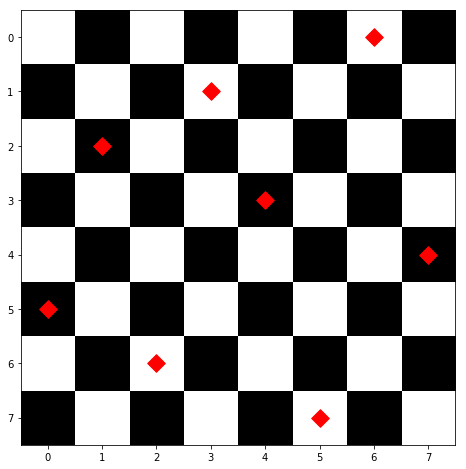

In [5]:
sol_no = 85
sol_plot_x = [sol[sol_no][i][0] for i in range(0,8)]

sol_plot_y = [sol[sol_no][i][1] for i in range(0,8)]

a = np.array([[1,0],[0,1]])
a = np.append(a,a, axis=1)
a = np.append(a,a, axis=1)
a = np.append(a,a, axis=0)
board = np.append(a,a, axis=0)

fig, ax = plt.subplots(figsize=(8,8))

plt.imshow(board, cmap='Greys_r')
#ax.set_axis_off
plt.scatter(sol_plot_y,sol_plot_x, marker="D", color="red", s=155)

plt.show()